# Admission Number: 148454


In [1]:
#loading required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score,f1_score,precision_score, recall_score,
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

# Set to display all columns
pd.set_option('display.max_columns', None)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
df=pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### **Question 1: Import the dataset using Pandas. Do you have missing values? If so, what option have you adopted to resolve it?**


In [3]:
df.shape

(569, 33)

In [4]:
# checking for missing values
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

**Insight:**

- From the cell above, the breast cancer dataset has 100% missing values in the Unnamed: 32 column. 
- To resolve this, l intend to drop the Unnamed:32 column from the dataset.

In [5]:
#dropping the columnn
df1= df.drop(['Unnamed: 32'],axis=1)# Confirming if there any more missing values
df1.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- Notice that we no longer have missing values present in the dataset

### **Question 2: Now analyze the data and do the pre-processing that you consider appropriate. Here we are asked to analyze the data incorporating medical knowledge to detect possible outliers, possible incoherent values, etc. You can use seaborn’s pairplot function if you see fit (sns.pairplot())**

In [6]:
df1.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Insights**

- Normal range for the radius mean is: 5 to 10mm for a Benign breast mass and 10 to 30mm for a malignant breast mass.
- Texture mean: Benign masses have a lower texture mean(10 - 20) and malignant masses have a higher texture mean(20-40)
- Perimeter mean: Benign masses have small perimeter mean(50mm - 90mm) and malignant masses have a perimeter mean of (100mm-150mm)
- Area_mean: Benign masses have mean values ranging from (100mm² - 500mm²) and malignant masses have (600mm² to 2500mm² or more)
- smoothness_mean: Benign masses range from (0.05 - 0.15) and for malignant have (0.15 to 0.30)
- compactness_mean: Benign masses range from(0.05 - 0.15) and for malignant (0.15 - 0.30)
- concavity_mean: Benign masses range (0.02 - 0.10) and malignant have ranges (0.10 - 0.30)
-concave points_mean: Benign masses range(0.02 - 0.10) and for malignant we have: (0.10 to 0.30)
- symmetry_mean: Benign masses range (0.15 to 0.30) and for malignant we have (0.30 to 0.50)
- fractal_dimension_mean: Benign masses range is (0.05 - 0.10) and for malignant we have (0.10 - 0.30)


### Checking outliers

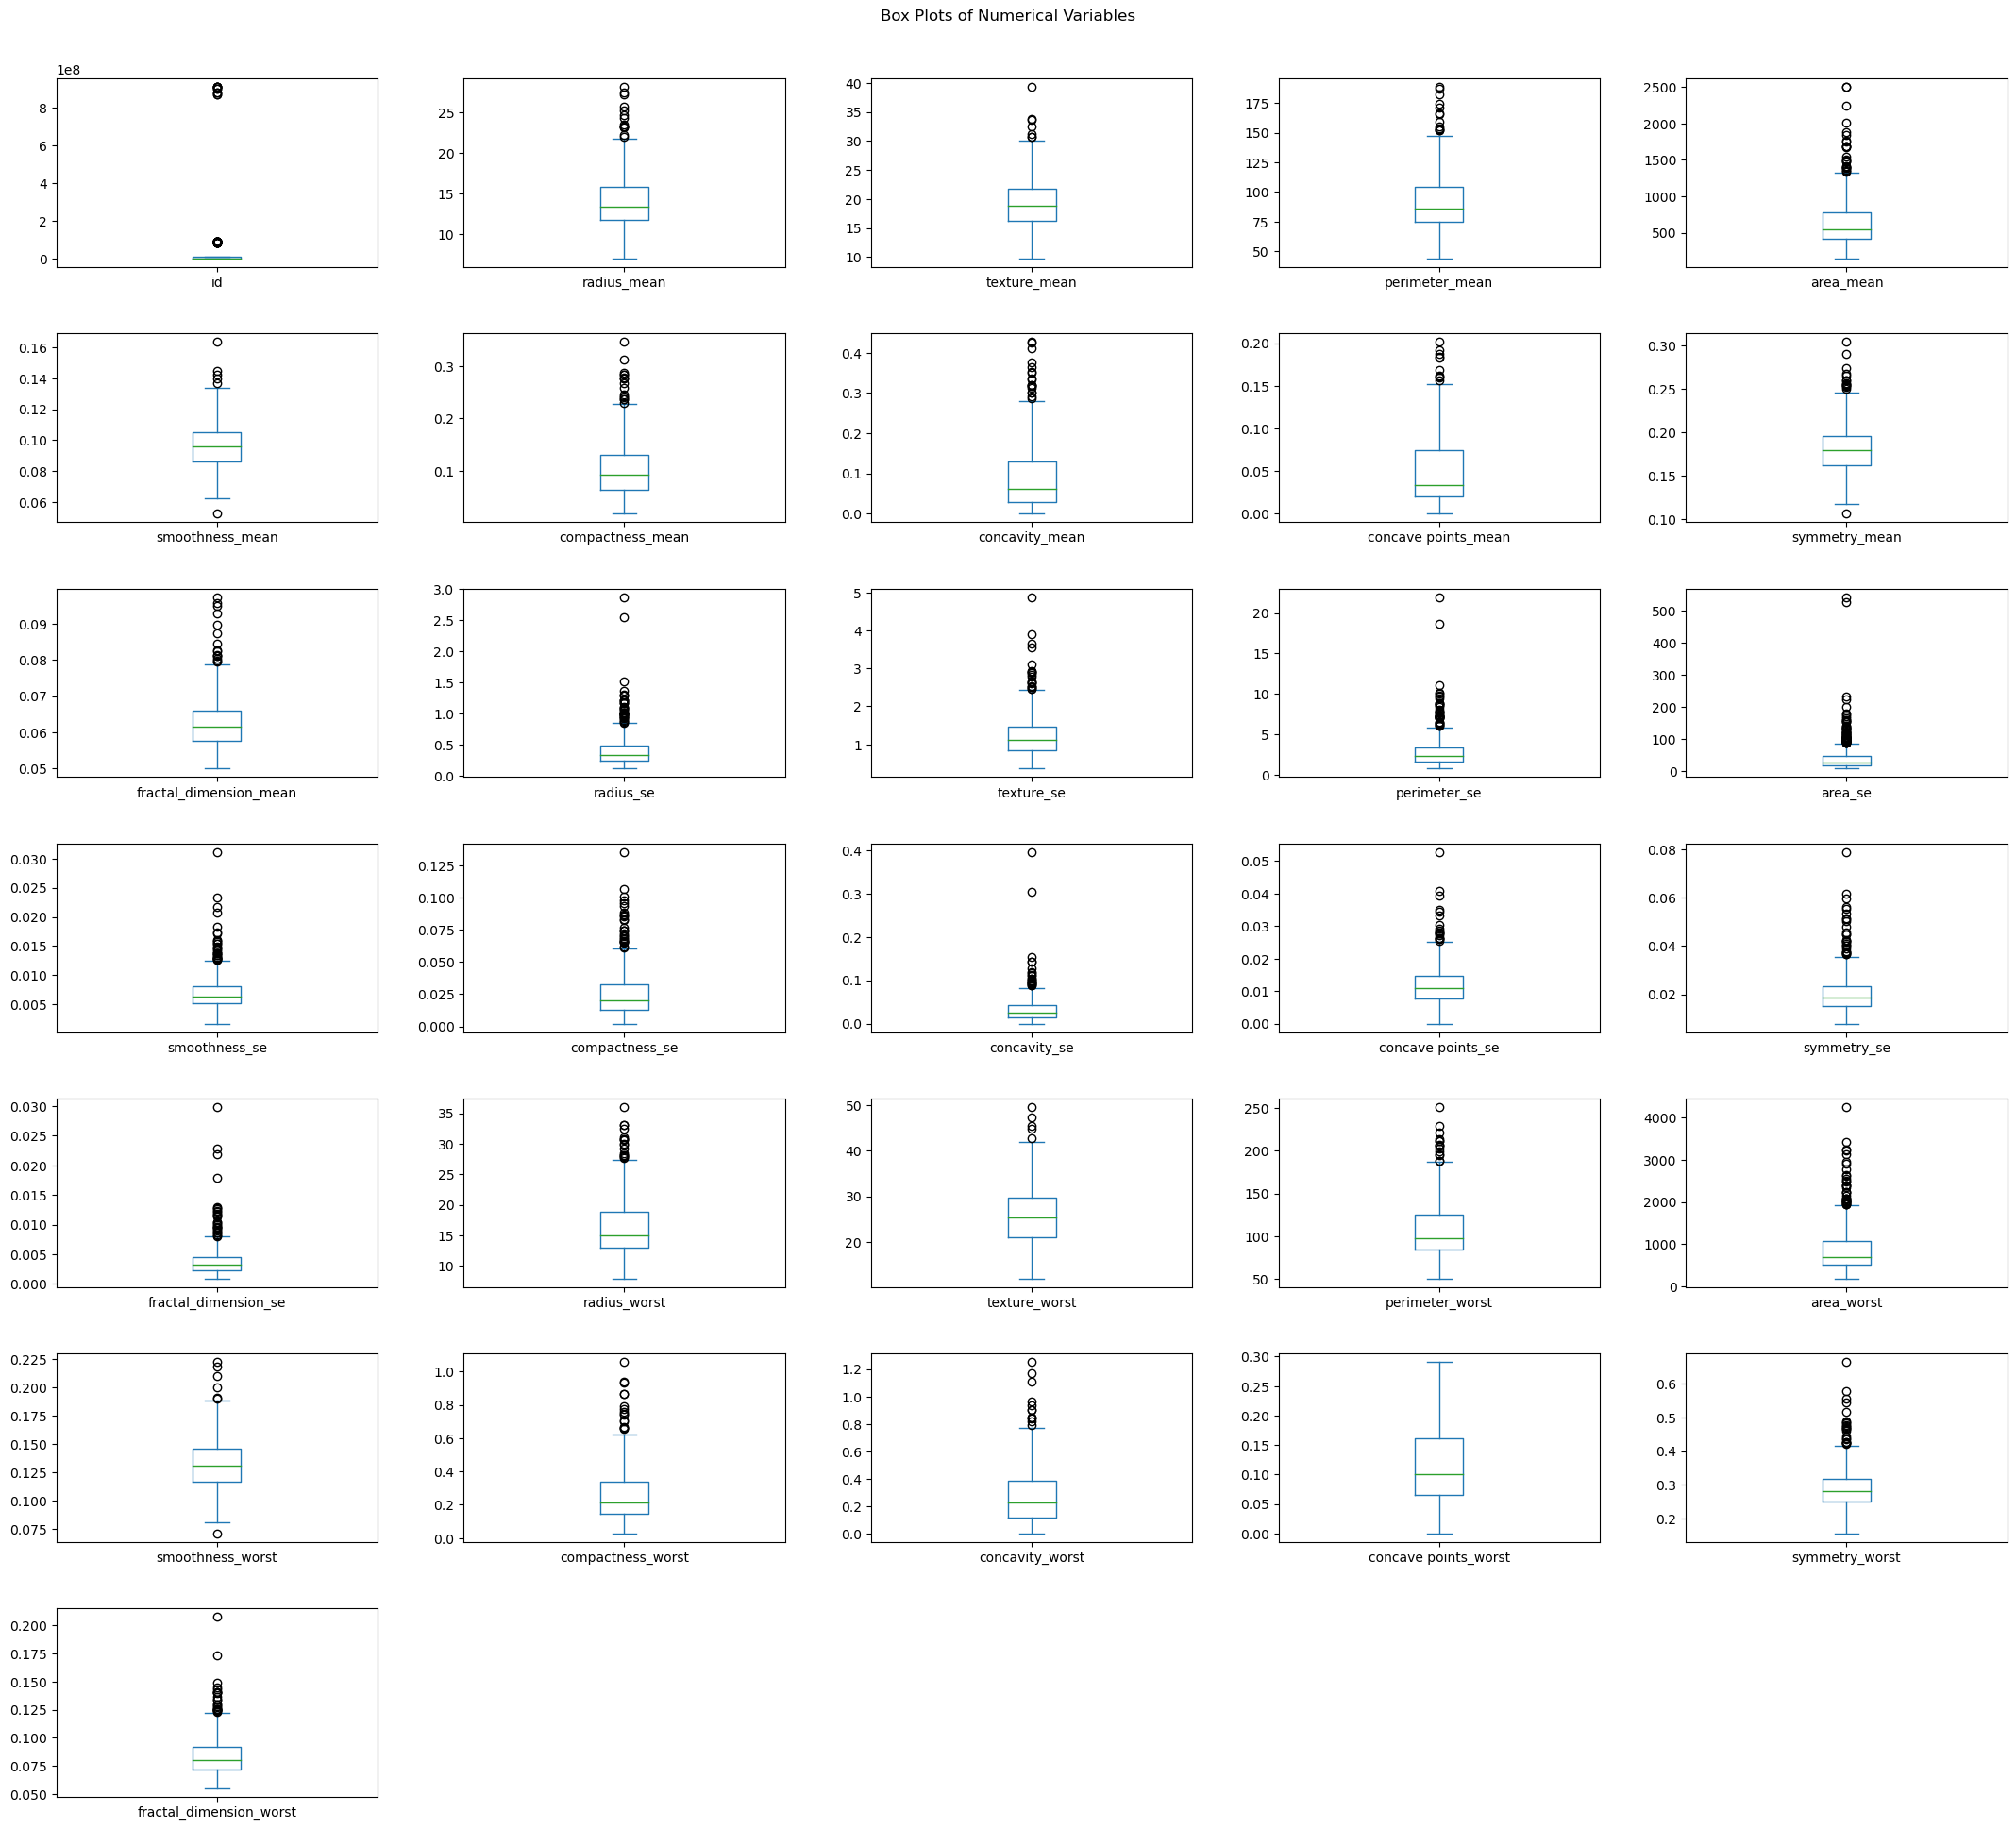

In [7]:
# Boxplots

# Select only numerical columns (float64 and int64)
numerical_columns = df1.select_dtypes(include=['float64', 'int64'])

# Plot boxplots for each numerical variable
numerical_columns.plot(kind='box', subplots=True, layout=(7, 5), figsize=(22, 20), title='Box Plots of Numerical Variables')

plt.suptitle('Box Plots of Numerical Variables')  # Adding a super title for the entire figure
plt.tight_layout(pad=3.0)  # Adjusts the layout to make sure labels and titles fit well
plt.show()


**Insights:**

-  The features based on the above plots indicate outliers however, based on the medical knowledge suggests that these values are expected and should not be treated as anomalies.

### **Question 3: Just by visualizing the point clouds of the variables (you don’t have to calculate), do you see a correlation between variables?**

In [8]:
# attain the first 100 records and plot a pairplot
df_subset = df1.iloc[:100, :10]

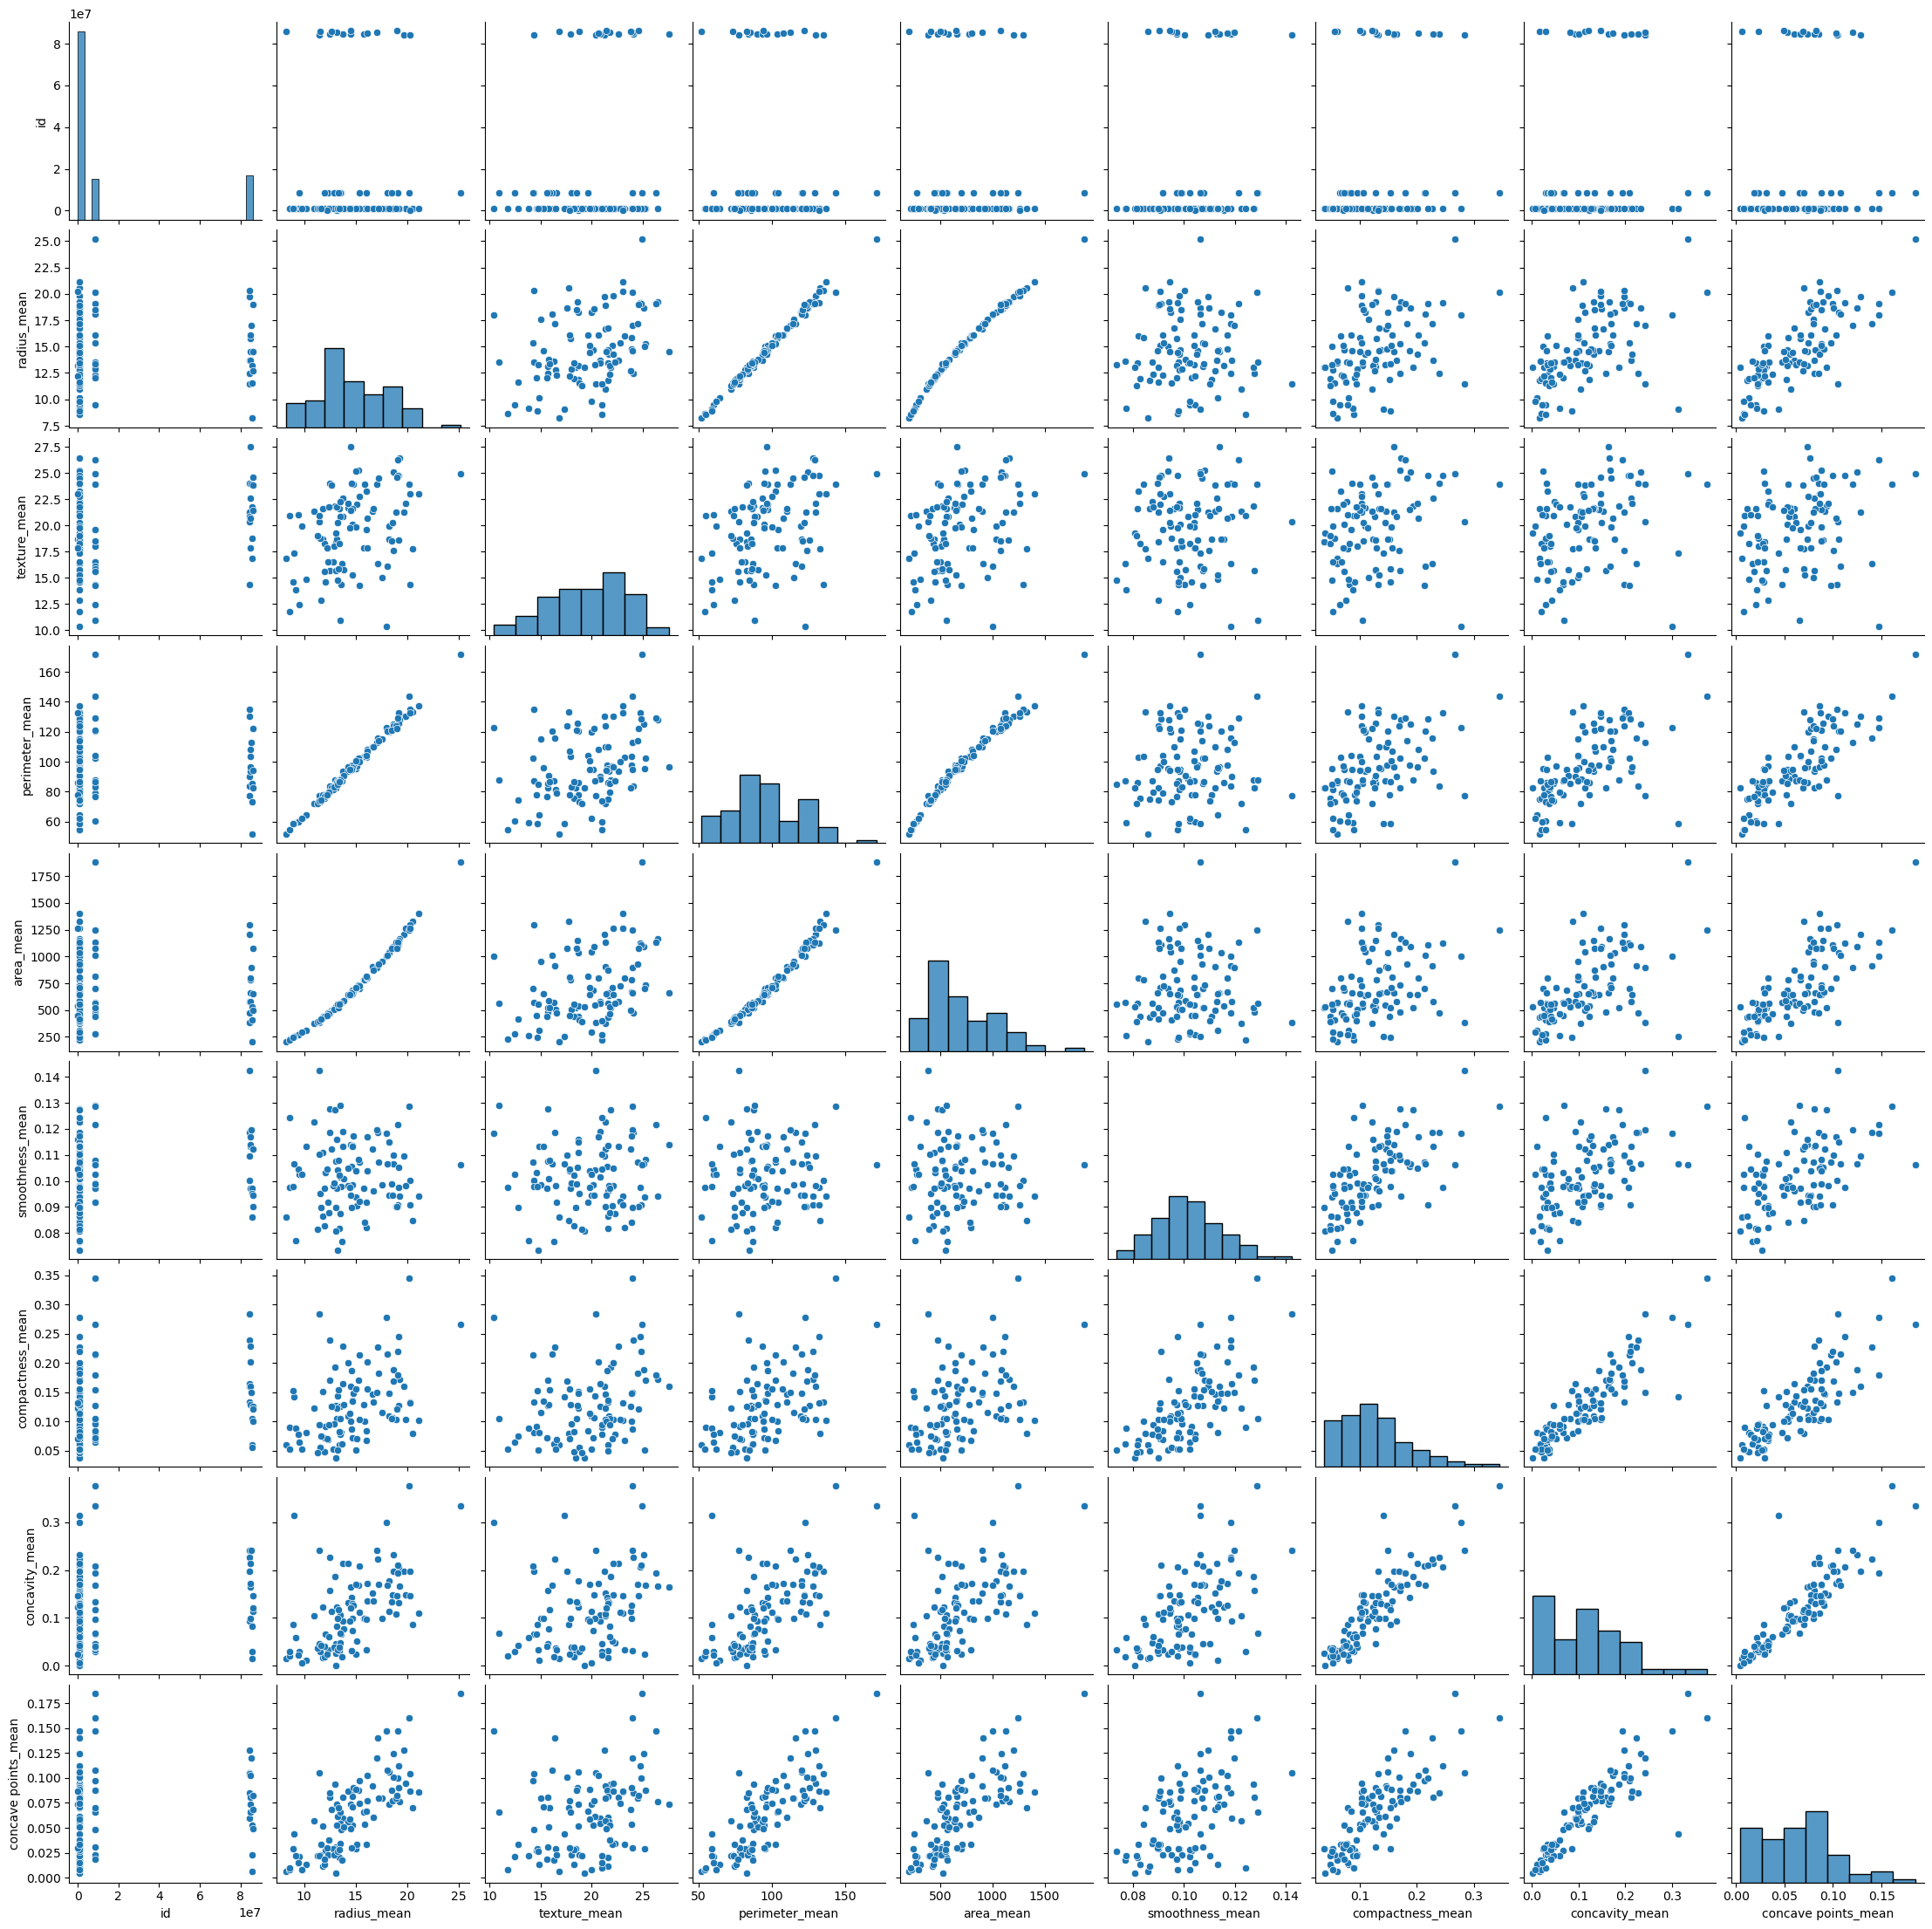

In [9]:
# Create pairplot
sns.pairplot(df_subset)
plt.show()

Observation:
- There is correlation between radius_mean and perimeter mean ; radius_mean and area_mean ;perimeter_mean and area_mean.

In [10]:
# Taking the next 10 variables
df_subset_ten = df.iloc[:100, 10:20]


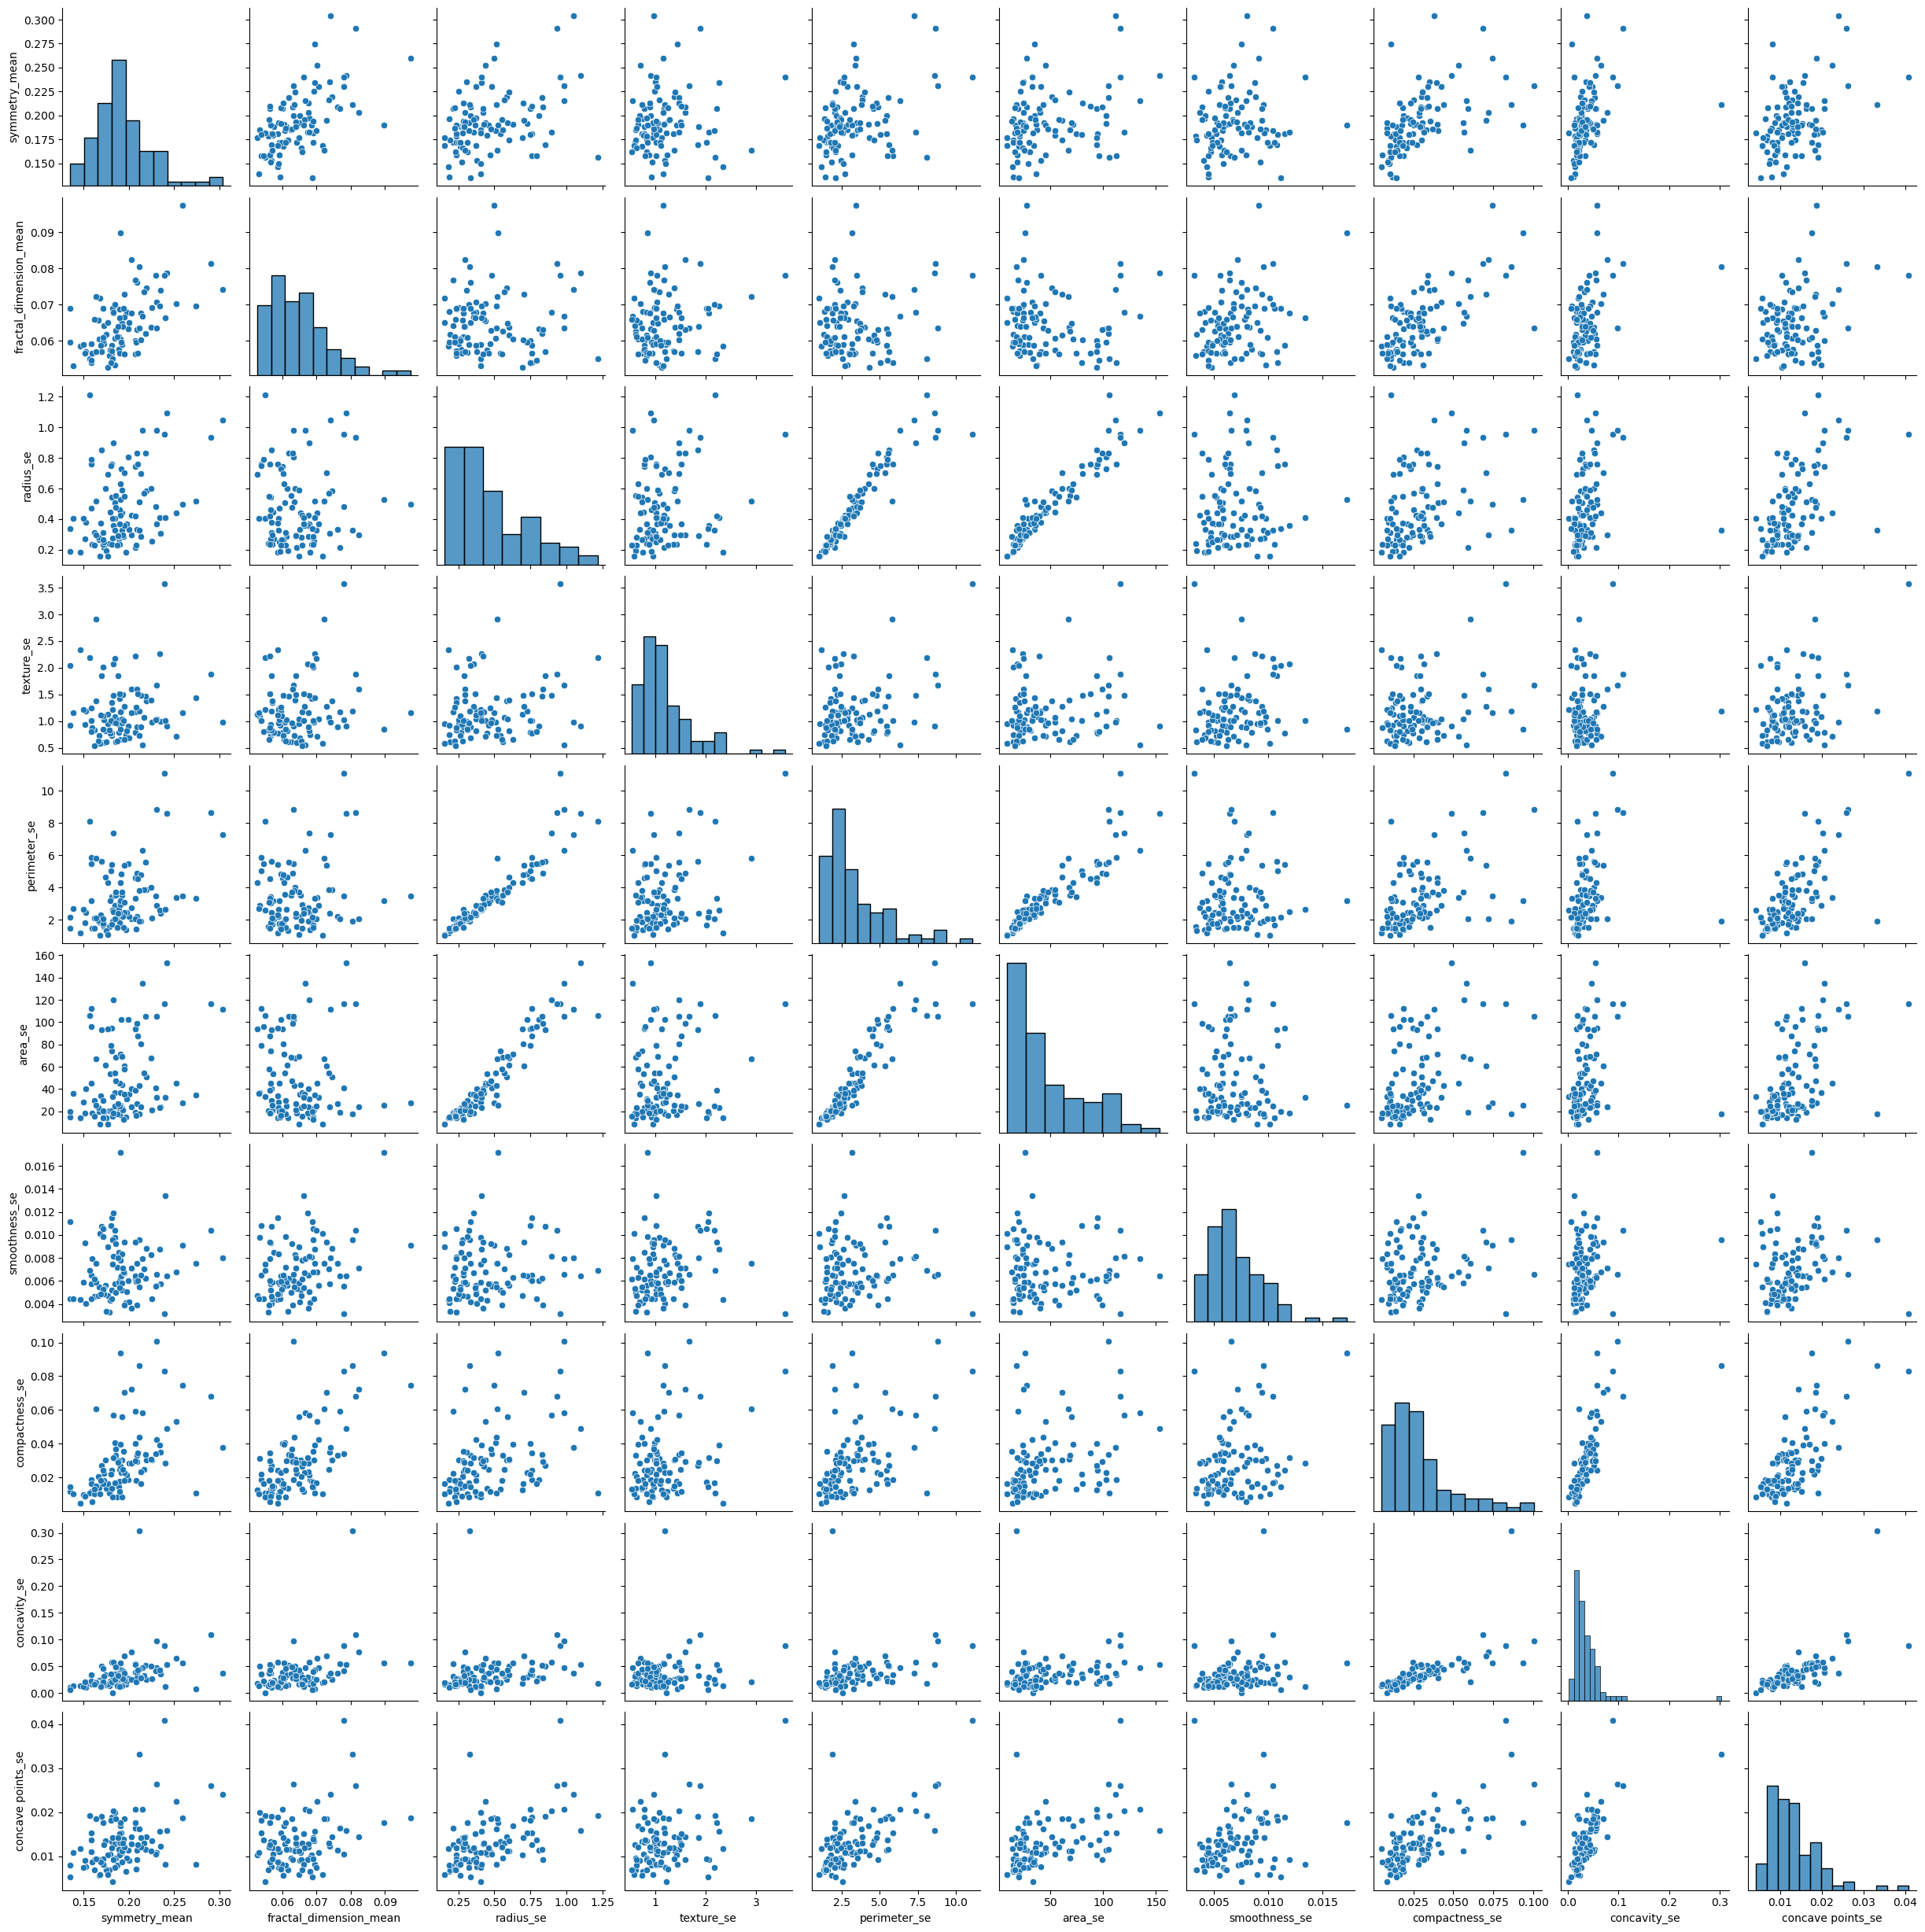

In [11]:
# Create pairplot
sns.pairplot(df_subset_ten)
plt.show()

Observation:
- There is correlation between radius_se and perimeter_se ; radius_se and area_se ;perimeter_se and area_se.

In [12]:
# Taking the remaining variables
df_subset_last_group = df.iloc[:100, 20:]


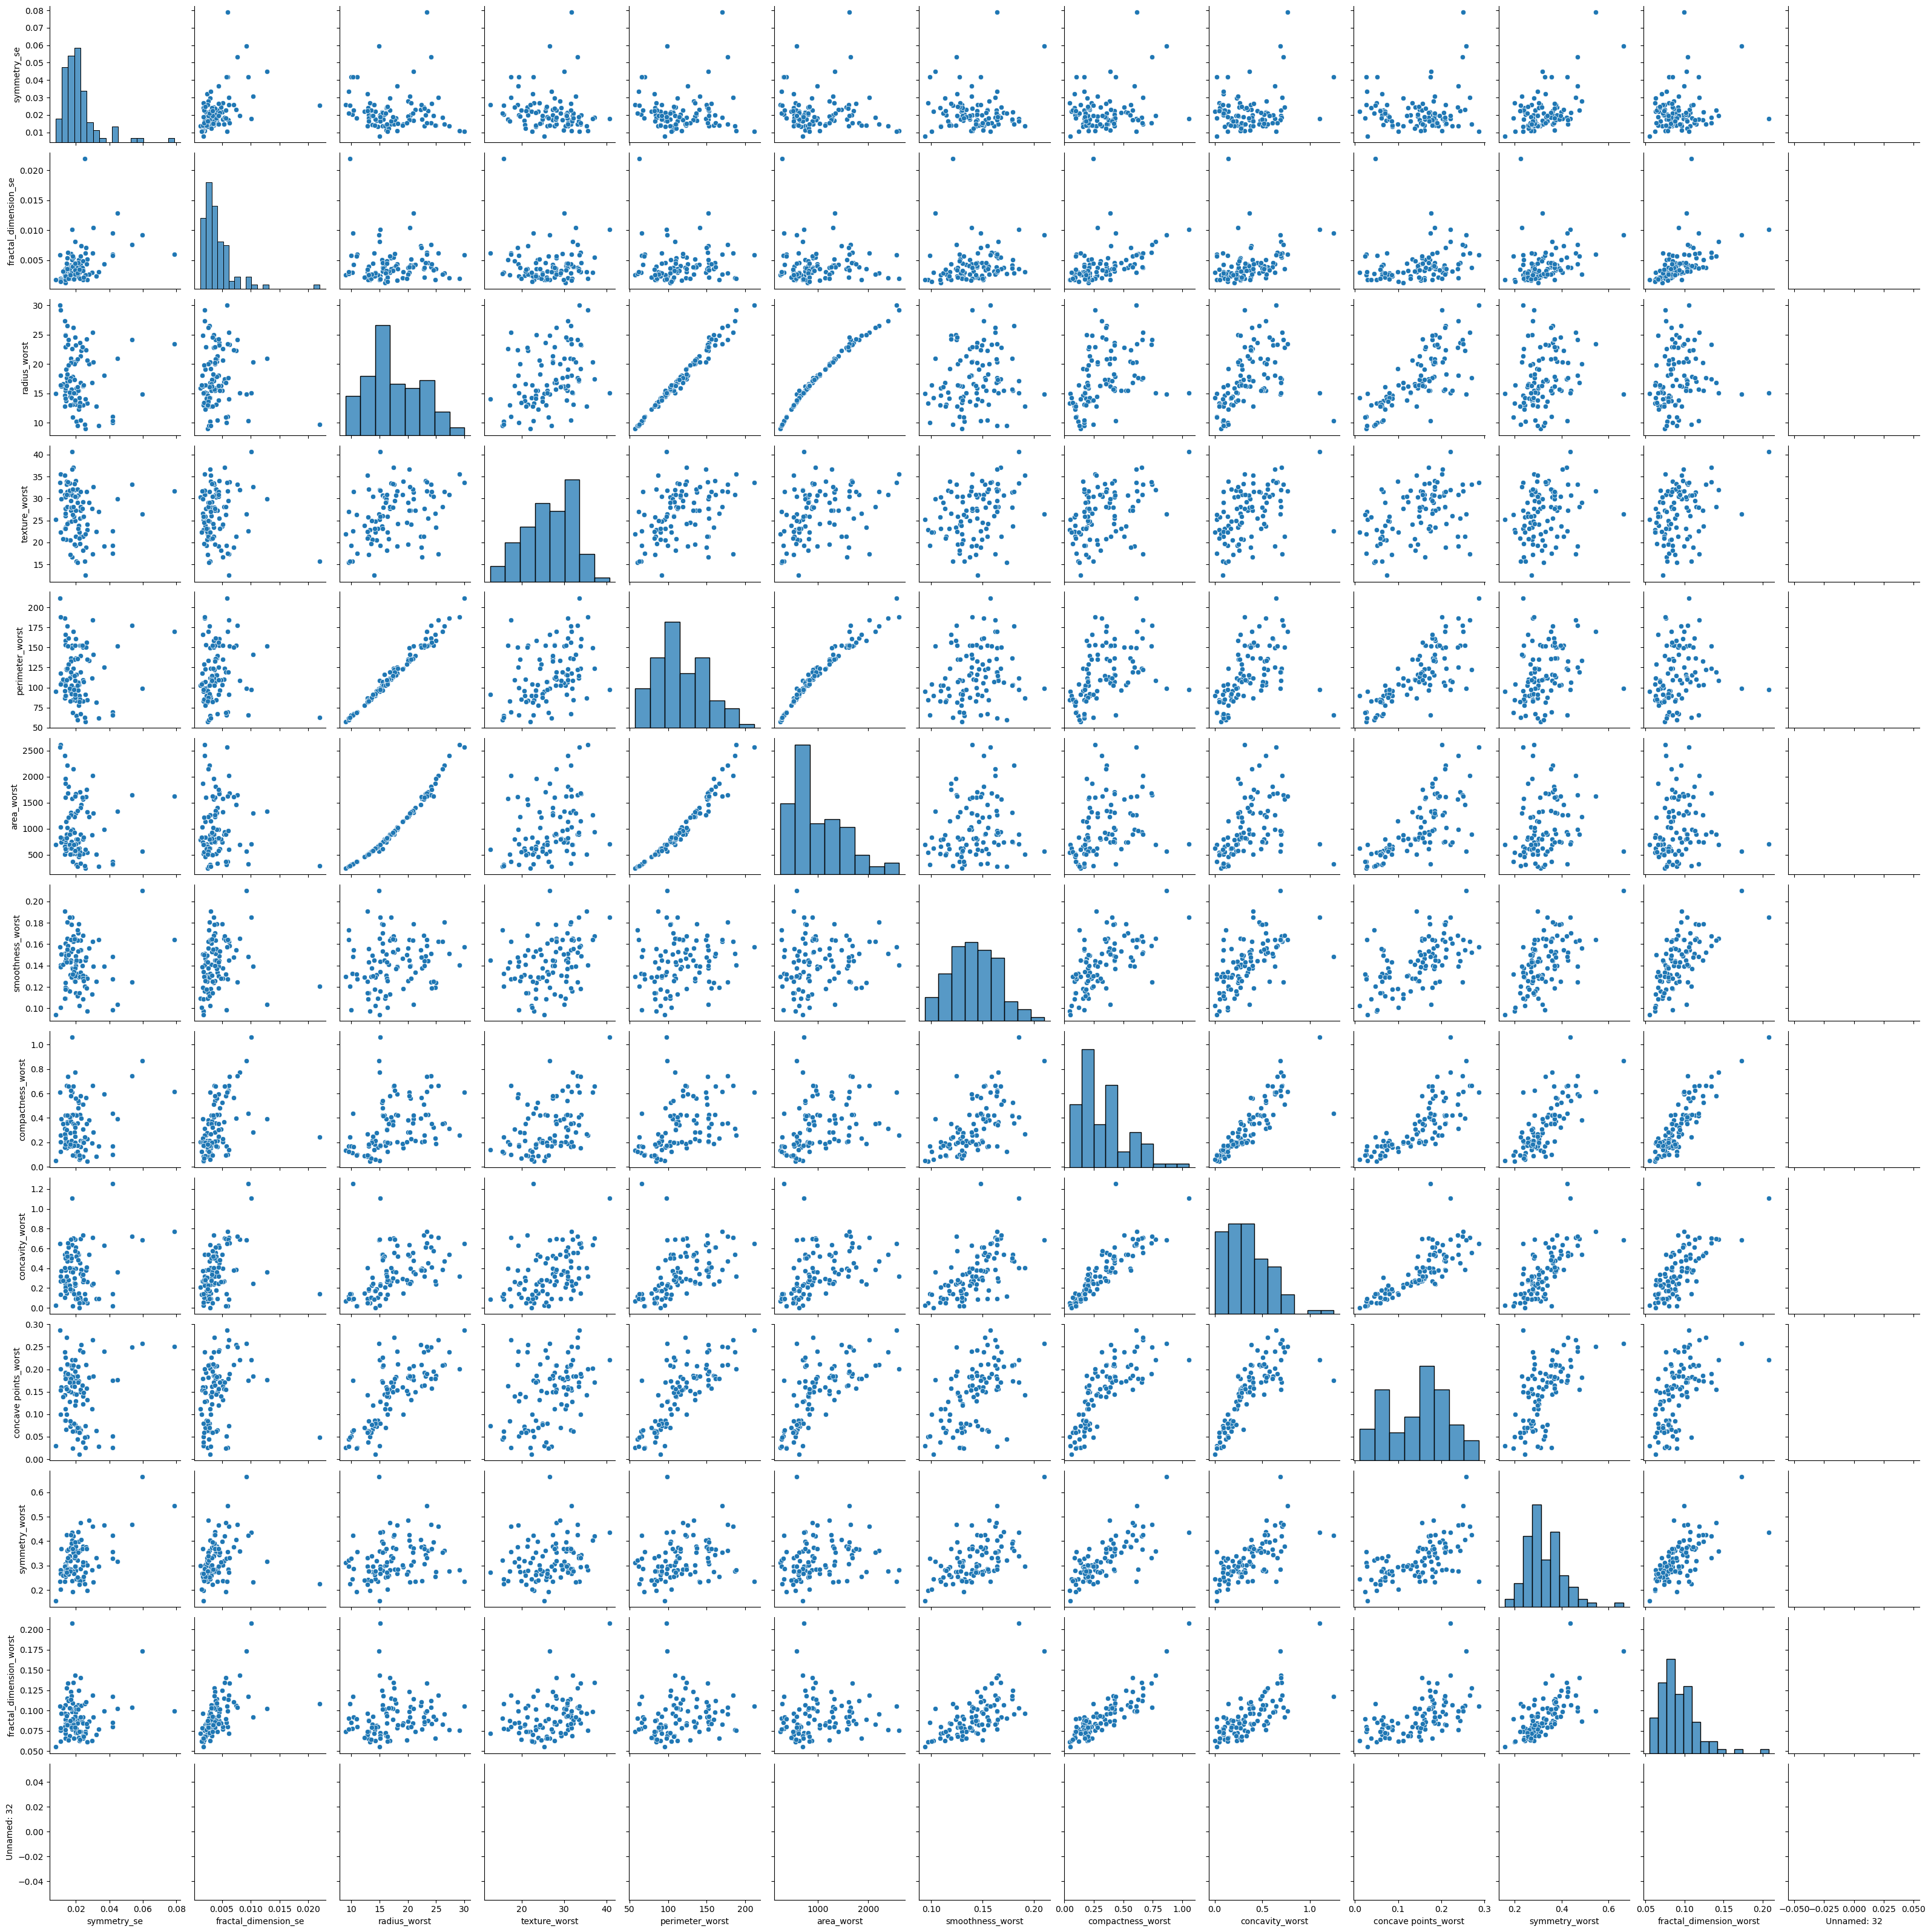

In [13]:
# Create pairplot
sns.pairplot(df_subset_last_group)
plt.show()

Observation:
- There is correlation between radius_worst and perimeter_worst ; radius_worst and area_worst ;perimeter_worst and area_worst.

### **Question 4: Now look at the variable ’id’. Is it convenient to use this variable? If you consider taking any action, indicate which one.**

In [14]:
# Compute correlation matrix
correlation_matrix = df1.select_dtypes(include=[np.number]).corr()

# Print correlation with 'id'
print(correlation_matrix['id'])


id                         1.000000
radius_mean                0.074626
texture_mean               0.099770
perimeter_mean             0.073159
area_mean                  0.096893
smoothness_mean           -0.012968
compactness_mean           0.000096
concavity_mean             0.050080
concave points_mean        0.044158
symmetry_mean             -0.022114
fractal_dimension_mean    -0.052511
radius_se                  0.143048
texture_se                -0.007526
perimeter_se               0.137331
area_se                    0.177742
smoothness_se              0.096781
compactness_se             0.033961
concavity_se               0.055239
concave points_se          0.078768
symmetry_se               -0.017306
fractal_dimension_se       0.025725
radius_worst               0.082405
texture_worst              0.064720
perimeter_worst            0.079986
area_worst                 0.107187
smoothness_worst           0.010338
compactness_worst         -0.002968
concavity_worst            0

**Insights:**
- Id feature has low correlation in comparison to other variables. Hence it is best to drop the id column.

In [15]:
# Dropping the ID column
df2 = df1.drop(['id'], axis=1)

### **Question 5: Now analyze the ’diagnosis’ variable, which would be the object of our study (predicting whether it is a benign or malignant case). What’s the problem with putting it in any algorithm? What solution are you going to adopt?**

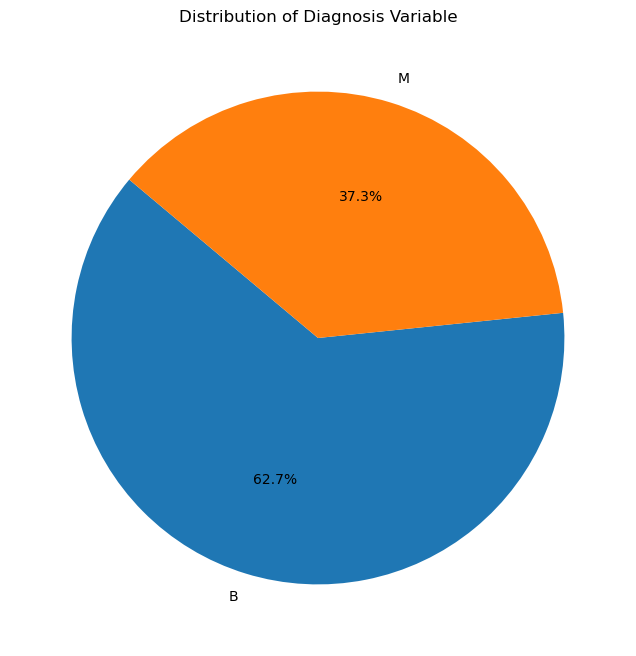

In [16]:
categorical_counts = df2['diagnosis'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(categorical_counts, labels=categorical_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Diagnosis Variable')
plt.show()

**Insights:**
- Most observations were benign at 62.7% of the total observations.
- Problem 1: The data is yet to be encoded and is currently still a string. To solve this we encode the variable
- Problem 2: The target variable is imbalanced because the Benign class is more than the malignant class. To solve the above we could undersample or oversample the dataset.

### **Question 6: Is this an unbalanced problem?**

Yes, based on the pie chart plotted above

### **Question 7:Apply normalization to the dataframe and divide the available examples into 80% for training and 20% for testing, randomly**

In [17]:
#Normalizing the dataframe
scaler = StandardScaler()
# Select numerical columns for normalization (excluding non-numeric columns )
numerical_cols = df2.select_dtypes(include=['float64', 'int64']).columns
df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])

In [18]:
df2

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,M,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [19]:
# Initialize the encoder
encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' avoids multicollinearity

# Fit and transform the 'diagnosis' column
diagnosis_encoded = encoder.fit_transform(df2[['diagnosis']])
# Create a DataFrame with the encoded values
df_encoded = pd.DataFrame(diagnosis_encoded, columns=encoder.get_feature_names_out(['diagnosis']))

# Concatenate the original DataFrame with the encoded columns, excluding the original 'diagnosis' column
df_final = pd.concat([df2.drop(columns=['diagnosis']), df_encoded], axis=1)
df_final.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1.0
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.0
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.0
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1.0
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.0


In [20]:
X = df_final.drop(columns=['diagnosis_M'])
y = df_final['diagnosis_M']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **Question 8:Now apply standard logistic regression (without regularization) to obtain a first data on the accuracy of the model. What parameters have you chosen in creating the logistic regression model?**

In [29]:
# Instantiating the model
log_reg = LogisticRegression(penalty='none')

In [30]:
# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set 
y_pred = log_reg.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)

# Print the accuracy
print(f'Accuracy of the Logistic Regression model: {accuracy:.2f}')
print(f'F1 of the Logistic Regression model: {f1:.2f}')


Accuracy of the Logistic Regression model: 0.94
F1 of the Logistic Regression model: 0.92


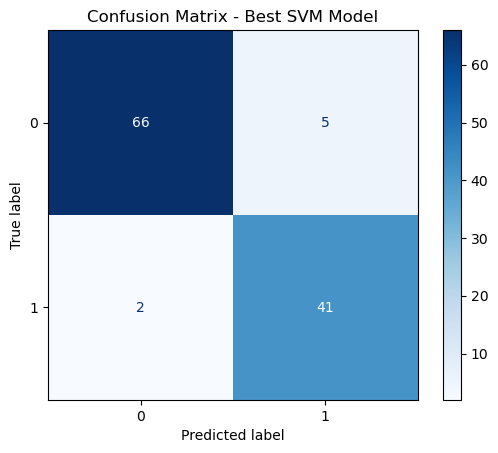

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95        71
         1.0       0.89      0.95      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [32]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

- Note that regularization is applied by default hence we changed the penalty parameter to None

### **Question 9: Compare model accuracy on test and training data. Does the model generalize well?**

In [27]:
# Make predictions
y_train_pred = log_reg.predict(X_train) 

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

# F1-score
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test,y_pred)



# Print the results
print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')
print('--------------------------------')
print(f' Training F1: {train_f1:.2f}')
print(f' Testing F1: {test_f1:.2f}')

Training Accuracy: 1.00
Test Accuracy: 0.94
--------------------------------
 Training F1: 1.00
 Testing F1: 0.92


**Insights:**
- The model generalizes fairly well, but the perfect training accuracy hints that it may be too tailored to the training data. This suggests tha the model may be overfitting.

### **Question 10. Now we will use L1 regularization to try to simplify the number of variables without losing performance. What variables have you been able to eliminate and what is the performance of the algorithm on both training and test data? What regularization value have you chosen?**

In [28]:
## Obtaining optimal parameters for Lasso

# Define the parameter grid
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Initialize Lasso
lasso = Lasso(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best alpha
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha value: {best_alpha}')

# Refit the model with the best alpha
lasso_best = Lasso(alpha=best_alpha, random_state=42)
lasso_best.fit(X_train, y_train)

Best alpha value: 0.01


Lasso(alpha=0.01, random_state=42)

- From the above, the regularization that we will use an alpha value of 0.01

In [33]:
# Initialize the Lasso model with a chosen alpha (regularization parameter)
alpha = 0.01
lasso_model = Lasso(alpha=alpha, random_state=42)

# Fit the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Convert continuous predictions to binary predictions (using a threshold of 0.5)
y_train_pred_binary = (y_train_pred_lasso > 0.5).astype(int)
y_test_pred_binary = (y_test_pred_lasso > 0.5).astype(int)

# Calculate classification metrics
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

train_precision = precision_score(y_train, y_train_pred_binary)
test_precision = precision_score(y_test, y_test_pred_binary)

train_recall = recall_score(y_train, y_train_pred_binary)
test_recall = recall_score(y_test, y_test_pred_binary)

train_f1 = f1_score(y_train, y_train_pred_binary)
test_f1 = f1_score(y_test, y_test_pred_binary)

train_conf_matrix = confusion_matrix(y_train, y_train_pred_binary)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_binary)

# Get the coefficients
coefficients = lasso_model.coef_

# Print the results
print(f'Training Accuracy with Lasso: {train_accuracy:.2f}')
print(f'Test Accuracy with Lasso: {test_accuracy:.2f}')


# Get the number of non-zero coefficients
non_zero_coefficients = np.sum(coefficients != 0)
print(f'Number of non-zero coefficients: {non_zero_coefficients}')

Training Accuracy with Lasso: 0.96
Test Accuracy with Lasso: 0.95
Number of non-zero coefficients: 13


In [34]:
# Getting the coeffecientis of the model
lasso_model.coef_

array([ 0.        ,  0.02372473,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.07945741, -0.        , -0.00700042,
        0.01317903,  0.        ,  0.        , -0.        ,  0.01347814,
       -0.01365382, -0.01301898,  0.        ,  0.        , -0.        ,
        0.16012184,  0.05300477,  0.        , -0.        ,  0.02002926,
        0.        ,  0.03291513,  0.09262629,  0.04770689,  0.        ])

In [35]:
# Get the names of the features
feature_names = X.columns

# Identify non-zero coefficients and corresponding feature names
non_zero_indices = np.where(coefficients > 0)[0]
non_zero_features = feature_names[non_zero_indices]
non_zero_coefficients = coefficients[non_zero_indices]

# Create a DataFrame for better readability
non_zero_features_df = pd.DataFrame({
    'Feature': non_zero_features,
    'Coefficient': non_zero_coefficients
})

# Print the non-zero features
print(non_zero_features_df)

                Feature  Coefficient
0          texture_mean     0.023725
1   concave points_mean     0.079457
2             radius_se     0.013179
3         smoothness_se     0.013478
4          radius_worst     0.160122
5         texture_worst     0.053005
6      smoothness_worst     0.020029
7       concavity_worst     0.032915
8  concave points_worst     0.092626
9        symmetry_worst     0.047707


Insights:
- Lasso is used for feature selection. The variables that have been found to be use ful are :

    texture_mean     
    concave points_mean    
    radius_se     
    smoothness_se     
    radius_worst    
    texture_worst   
    smoothness_worst    
    concavity_worst     
    concave points_worst   
    symmetry_worst  

- Their respective coeffecients are shown above      


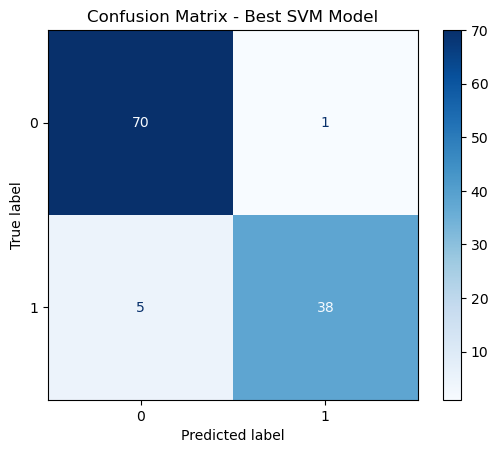

Classification Report:

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        71
         1.0       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [37]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred_binary)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_test_pred_binary))

### **Question 11:What variables has the model chosen? Does it make sense from a medical point of view? (Eventhan you are not physicians try to guess).**

- The variables chosen are:

    texture_mean     
    concave points_mean    
    radius_se     
    smoothness_se     
    radius_worst    
    texture_worst   
    smoothness_worst    
    concavity_worst     
    concave points_worst   
    symmetry_worst

- Yes the variables that the model has chosen make sense since malignant and benign masses have different characteristics in terms of the radius, texture, smoothness and symmetry of the mass.


### **Question 12: Train an SVM model with Gaussian kernel and compare results. For both the gamma parameter and C we will try the values 0.1, 1 and 10 and we will work with 5-fold CV. What combination of values provides the best result? What is the accuracy of the model?**

In [38]:

# Define the parameter grid for gamma and C
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 1, 10]
}

# Initialize the SVM model with Gaussian (RBF) kernel
svm_model = SVC(kernel='rbf', random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best cross-validation score
print(f'Best Parameters: {best_params}')
print(f'Best Cross-Validation Accuracy: {best_score:.2f}')


# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Output the best parameters and accuracies
print(f"Test Accuracy: {test_accuracy:.4f}")


Best Parameters: {'C': 1, 'gamma': 0.1}
Best Cross-Validation Accuracy: 0.96
Test Accuracy: 0.9649


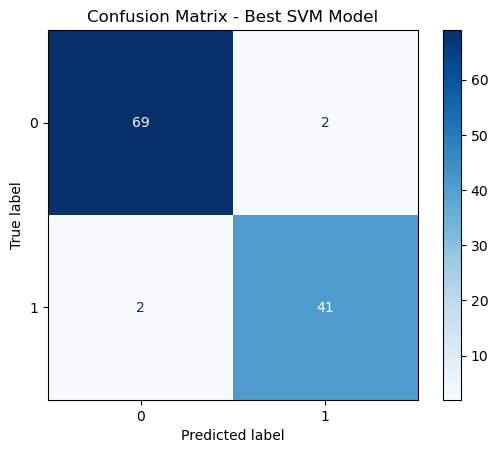

Classification Report:

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        71
         1.0       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [39]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Best SVM Model")
plt.show()

# Print Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

### **Question 13:Finally, choose the best model obtained, visualize its confusion matrix and analyze the result with what was seen in week 3**

Recall/Sensitivity is the ratio of positive instances that are correctly detected by the classifier. I'd want my model to correctly detect malignant tissues, in this particular case it makes the SVM and logistic model the best models.

Precision is the accuracy of the positive prediction.In an instance where I would want my model to be almost 100% accurate,Lasso would be the best model to go for.

F1-score uses both recall and precision. A model with a high F1-score is considered a good model.Hence in this particular problem, SVM emerges as the best model.